In [1]:
import numpy as np
import matplotlib as plt

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## P1

In [4]:
arr = np.loadtxt('/content/drive/MyDrive/p1_train.csv',delimiter = ',')

X = np.array(arr[:,[0,1]])
Y = np.array(arr[:,2])
Xt = X.transpose()
A = Xt.dot(X)
A = np.linalg.inv(A)
W =np.array((A.dot(Xt)).dot(Y))
b = np.mean(Y) - np.mean(X[:,0])*W[0] - W[1] * np.mean(X[:,1])



In [6]:
test = np.loadtxt('/content/drive/MyDrive/p1_test.csv', delimiter = ',')
X_test = np.array(test[:,[0,1]])
Y_test = np.array(test[:,2])
Y_pred = X_test.dot(W) +b


## 1a

In [7]:
mse = np.square(np.subtract(Y_test, Y_pred)).mean()
print("Mean Squared Error : " +str(mse))

Mean Squared Error : 5.054426896224298


## 1b

In [8]:
print("Mean Absolute Error :")
print(np.abs(np.subtract(Y_test, Y_pred)).mean())


Mean Absolute Error :
1.8000452800720788


## 1c

In [9]:
from scipy import stats #only for P value
t,p_val = stats.ttest_ind(Y_pred,Y_test)
print("\n p value is",p_val)


 p value is 0.907665125884347


# P2

# P2 Cubic polynomial Regression


In [32]:

import numpy as np
from numpy.linalg import inv


filename1 = "/content/drive/MyDrive/p2_train.csv"
filename2 = "/content/drive/MyDrive/p2_test.csv"

x = np.ones((10000,4))  # Each row of x depicts a feature vector augmenting feature vector with '1' to account for constant 'b' in linear model
y = np.zeros((10000,1))  # Each row depicts a label corresponding to respective feature vector


data_np = np.loadtxt(filename1,delimiter=",")

#Splitting given data into feature vectors and labels
for i in range(10000):
    x[i,:3] = data_np[i,:3]
    y[i] = data_np[i,3]
print("\n \n Given training data with '1' augmented in last is:")
print(x)


#Normalising training feature vectors

x[:,0] = x[:,0]/np.max(x, axis = 0)[0]
x[:,1] = x[:,1]/np.max(x, axis = 0)[1]
x[:,2] = x[:,2]/np.max(x, axis = 0)[2]


print("\n \n Given target variable values are:")
print(y)

#Normalising training target variables

y = y/np.max(y)
print("\n \n The normalized target vraiables")
print(y)

_,feature_vec_dim = np.shape(x)


for i in range(10000):        #changing feature vectorm components such that the generalized linear regressor will be of the form (w1)*(x1^3)+(w2)*(x2^2)+(w3)*(x3)+w4
    x[i,0] = x[i,0]**3        #instead of computing ^3 of first feature component every time I modified the data itself   
    x[i,1] = x[i,1]**2        #similarly for ^2 term
    x[i,2] = x[i,2]

#Learning W* i.e., optimal linear regression coefficients of W^T*x+b

Opt_W = np.ones((feature_vec_dim,1))  # The last component of Opt_W is the constant 'b'
np.shape(Opt_W)

pseudo_inverse = inv(np.matmul(np.transpose(x),x))
np.shape(pseudo_inverse)
Opt_W = np.matmul(np.matmul(pseudo_inverse,np.transpose(x)),y)
print("\n \n The optimal regression Coefficients are:")
print(Opt_W)



x_test = np.ones((5000,3))  # Each row of x depicts a feature vector
y_test = np.zeros((5000,1))  # Each row depicts a label corresponding to respective feature vector


data_test_np = np.loadtxt(filename2, delimiter = ',')

#Splitting given data into feature vectors and labels
for i in range(5000):
    x_test[i,:3] = data_test_np[i,:3]
    y_test[i] = data_test_np[i,3]
print("\n \n Given testing data is:")
print(x_test)
print("\n \n Given target variable values are:")
print(y_test)


#Normalising testing feature vectors

x_test[:,0] = x_test[:,0]/np.max(x_test, axis = 0)[0]
x_test[:,1] = x_test[:,1]/np.max(x_test, axis = 0)[1]
x_test[:,2] = x_test[:,2]/np.max(x_test, axis = 0)[2]


#Normalising testing target variables

y_test = y_test/np.max(y_test)



y_obt = np.zeros((5000,1))
loss = 0

#Output of Learned Generalised Linear Regressor
for i in range(5000):
    y_obt[i,0] = (Opt_W[0]*x_test[i,0]*x_test[i,0]*x_test[i,0])+(Opt_W[1]*x_test[i,1]*x_test[i,1])+(Opt_W[2]*x_test[i,2])+Opt_W[3]
    loss += abs(y_obt[i]-y_test[i])

mean_loss = (1/5000)*loss

MSE_LOSS = (1/5000)*(np.linalg.norm(y_obt-y_test)**2)
print("\033[1m" "\n \n The Mean Square Error for Testing Data is: " "\033[1m", MSE_LOSS)


print("\n \n The Mean Absolute Error  Testing Data is :", mean_loss) 

y_obt_train = np.zeros((10000,1))
for i in range(10000):
    y_obt_train[i,0] = (Opt_W[0]*x[i,0])+(Opt_W[1]*x[i,1])+(Opt_W[2])
    loss += abs(y_obt_train[i]-y[i])

MSE_LOSS_Train = (1/5000)*(np.linalg.norm(y_obt_train-y)**2)
print("\n \n The Mean Square Error  for training data is: ", MSE_LOSS_Train)

mean_loss_train = (1/5000)*loss
print("\n \n The Mean Absolute Error for training data is :", mean_loss_train)


t,p_val = stats.ttest_ind(y_obt,y_test)
print("\n p value is",p_val)



 
 Given training data with '1' augmented in last is:
[[ 6.50199562 -8.53698298  3.42293467  1.        ]
 [ 1.32838341  8.94357801 -8.1453072   1.        ]
 [ 0.16147819 -7.92835138  1.62892423  1.        ]
 ...
 [ 5.15542189  5.50082251  7.80498384  1.        ]
 [ 7.41019691 -3.09607941  4.39444446  1.        ]
 [ 8.65839198  2.12902551 -2.23757771  1.        ]]

 
 Given target variable values are:
[[119980.22024611]
 [ 29890.22497419]
 [  3245.57940455]
 ...
 [165778.15376855]
 [212850.41402952]
 [396440.75119642]]

 
 The normalized target vraiables
[[0.054853  ]
 [0.01366532]
 [0.00148383]
 ...
 [0.07579107]
 [0.09731174]
 [0.18124625]]

 
 The optimal regression Coefficients are:
[[0.06113031]
 [0.00237339]
 [0.01575185]
 [0.07202742]]

 
 Given testing data is:
[[-1.45309791 -3.53584826  4.95758124]
 [-0.95147775 -4.95411881 -4.57267293]
 [ 3.87680489  9.70711555  6.01268126]
 ...
 [-6.7161272   2.11243758  2.74666533]
 [ 8.97195853 -3.13095926 -5.37254693]
 [ 7.2041439   5.134

# Exponential

In [33]:

import numpy as np
from numpy.linalg import inv
import math



x = np.ones((10000,4))  # Each row of x depicts a feature vector augmenting feature vector with '1' to account for constant 'b' in linear model
y = np.zeros((10000,1))  # Each row depicts a label corresponding to respective feature vector


data_np = np.loadtxt(filename1, delimiter = ',')

#Splitting given data into feature vectors and labels
for i in range(10000):
    x[i,:3] = data_np[i,:3]
    y[i] = data_np[i,3]
print("\n \n Given training data with '1' augmented in last is:")
print(x)
print("\n \n Given target variable values are:")
print(y)



#Normalising training feature vectors

x[:,0] = x[:,0]/np.max(x, axis = 0)[0]
x[:,1] = x[:,1]/np.max(x, axis = 0)[1]
x[:,2] = x[:,2]/np.max(x, axis = 0)[2]


print("\n \n Given target variable values are:")
print(y)

#Normalising training target variables

y = y/np.max(y)
print("\n \n The normalized target vraiables")
print(y)



_,feature_vec_dim = np.shape(x)


for i in range(10000):        #changing feature vectorm components such that the generalized linear regressor will be of the form (w1)*(e^x1)+(w2)*(e^x2)+(w3)*(e^x3)+w4
    x[i,0] = math.exp(x[i,0])        #instead of computing e^x of first feature component every time I modified the data itself   
    x[i,1] = math.exp(x[i,1])        #similarly for e^x term
    x[i,1] = x[i,1]**2
    x[i,2] = math.exp(x[i,2])
    x[i,2] = x[i,2]**3



#Learning W* i.e., optimal linear regression coefficients of W^T*x+b

Opt_W = np.ones((feature_vec_dim,1))  # The last component of Opt_W is the constant 'b'
np.shape(Opt_W)

pseudo_inverse = inv(np.matmul(np.transpose(x),x))
np.shape(pseudo_inverse)
Opt_W = np.matmul(np.matmul(pseudo_inverse,np.transpose(x)),y)
print("\n \n  The optimal regression Coefficients are:")
print(Opt_W)





x_test = np.ones((5000,3))  # Each row of x depicts a feature vector
y_test = np.zeros((5000,1))  # Each row depicts a label corresponding to respective feature vector


data_test_np = np.loadtxt(filename2,delimiter = ',')

#Splitting given data into feature vectors and labels
for i in range(5000):
    x_test[i,:3] = data_test_np[i,:3]
    y_test[i] = data_test_np[i,3]
print("\n \n Given testing data is:")
print(x_test)
print("\n \n Given target variable values are:")
print(y_test)


#Normalising testing feature vectors

x_test[:,0] = x_test[:,0]/np.max(x_test, axis = 0)[0]
x_test[:,1] = x_test[:,1]/np.max(x_test, axis = 0)[1]
x_test[:,2] = x_test[:,2]/np.max(x_test, axis = 0)[2]


#Normalising testing target variables

y_test = y_test/np.max(y_test)
print("\n \n Normalized test target variables")
print(y_test)


y_obt = np.zeros((5000,1))
loss = 0

#Output of Learned Linear Regressor
for i in range(5000):
    y_obt[i,0] = (Opt_W[0]*math.exp(x_test[i,0]))+(Opt_W[1]*math.exp(x_test[i,1])*math.exp(x_test[i,1]))+(Opt_W[2]*math.exp(x_test[1,2])*math.exp(x_test[1,2])*math.exp(x_test[1,2]))+(Opt_W[3])
    loss += abs(y_obt[i]-y_test[i])

mean_loss = (1/5000)*loss

MSE_LOSS = (1/5000)*(np.linalg.norm(y_obt-y_test)**2)
print("\033[1m" "\n \n The Mean Square Error for Testing Data is: " "\033[1m", MSE_LOSS)


print("\n \n The Mean Absolute Error for Testing Data is :", mean_loss)   



for i in range(10000):
    y_obt_train[i,0] = (Opt_W[0]*x[i,0])+(Opt_W[1]*x[i,1])+(Opt_W[2])
    loss += abs(y_obt_train[i]-y[i])

MSE_LOSS_Train = (1/5000)*(np.linalg.norm(y_obt_train-y)**2)
print("\n \n The Mean Square Error  for training data is: ", MSE_LOSS_Train)

mean_loss_train = (1/5000)*loss
print("\n \n The Mean Absolute Error for training data is :", mean_loss_train)

t,p_val = stats.ttest_ind(y_obt,y_test)
print("\n p value is",p_val)



 
 Given training data with '1' augmented in last is:
[[ 6.50199562 -8.53698298  3.42293467  1.        ]
 [ 1.32838341  8.94357801 -8.1453072   1.        ]
 [ 0.16147819 -7.92835138  1.62892423  1.        ]
 ...
 [ 5.15542189  5.50082251  7.80498384  1.        ]
 [ 7.41019691 -3.09607941  4.39444446  1.        ]
 [ 8.65839198  2.12902551 -2.23757771  1.        ]]

 
 Given target variable values are:
[[119980.22024611]
 [ 29890.22497419]
 [  3245.57940455]
 ...
 [165778.15376855]
 [212850.41402952]
 [396440.75119642]]

 
 Given target variable values are:
[[119980.22024611]
 [ 29890.22497419]
 [  3245.57940455]
 ...
 [165778.15376855]
 [212850.41402952]
 [396440.75119642]]

 
 The normalized target vraiables
[[0.054853  ]
 [0.01366532]
 [0.00148383]
 ...
 [0.07579107]
 [0.09731174]
 [0.18124625]]

 
  The optimal regression Coefficients are:
[[ 0.06204633]
 [ 0.00150566]
 [ 0.00424262]
 [-0.01719437]]

 
 Given testing data is:
[[-1.45309791 -3.53584826  4.95758124]
 [-0.95147775 -4.9

# Trigonometric Model

In [34]:

import numpy as np
from numpy.linalg import inv
import math
from scipy import stats


x = np.ones((10000,4))  # Each row of x depicts a feature vector augmenting feature vector with '1' to account for constant 'b' in linear model
y = np.zeros((10000,1))  # Each row depicts a label corresponding to respective feature vector


data_np = np.loadtxt(filename1,delimiter = ',')

#Splitting given data into feature vectors and labels
for i in range(10000):
    x[i,:3] = data_np[i,:3]
    y[i] = data_np[i,3]
print("\n \n Given training data with '1' augmented in last is:")
print(x)
print("\n \n Given target variable values are:")
print(y)



#Normalising training feature vectors

x[:,0] = x[:,0]/np.max(x, axis = 0)[0]
x[:,1] = x[:,1]/np.max(x, axis = 0)[1]
x[:,2] = x[:,2]/np.max(x, axis = 0)[2]



#Normalising training target variables

y = y/np.max(y)
print("\n \n The normalized target vraiables")
print(y)



_,feature_vec_dim = np.shape(x)


for i in range(10000):        #changing feature vectorm components such that the generalized linear regressor will be of the form (w1)*(sin(x1))+(w2)*(cos(x2))+(w3)*(tan(x3))+w4
    x[i,0] = math.sin(x[i,0])        #instead of computing sin(x) of first feature component every time I modified the data itself   
    x[i,1] = math.cos(x[i,1])        #similarly for cos(x) term
    x[i,2] = math.tan(x[i,2])        #similarly for tan(x) term


#Learning W* i.e., optimal linear regression coefficients of W^T*x+b

Opt_W = np.ones((feature_vec_dim,1))  # The last component of Opt_W is the constant 'b'
np.shape(Opt_W)

pseudo_inverse = inv(np.matmul(np.transpose(x),x))
np.shape(pseudo_inverse)
Opt_W = np.matmul(np.matmul(pseudo_inverse,np.transpose(x)),y)
print("\n \n  The optimal regression Coefficients are:")
print(Opt_W)





x_test = np.ones((5000,3))  # Each row of x depicts a feature vector
y_test = np.zeros((5000,1))  # Each row depicts a label corresponding to respective feature vector


data_test_np = np.loadtxt(filename2, delimiter = ',')

#Splitting given data into feature vectors and labels
for i in range(5000):
    x_test[i,:3] = data_test_np[i,:3]
    y_test[i] = data_test_np[i,3]
print("\n \n Given testing data is:")
print(x_test)
print("\n \n Given target variable values are:")
print(y_test)


#Normalising testing feature vectors

x_test[:,0] = x_test[:,0]/np.max(x_test, axis = 0)[0]
x_test[:,1] = x_test[:,1]/np.max(x_test, axis = 0)[1]
x_test[:,2] = x_test[:,2]/np.max(x_test, axis = 0)[2]


#Normalising testing target variables

y_test = y_test/np.max(y_test)
print("\n \n Normalized test target variables")
print(y_test)


y_obt = np.zeros((5000,1))
loss = 0

#Output of Learned Linear Regressor
for i in range(5000):
    y_obt[i,0] = (Opt_W[0]*math.sin(x_test[i,0]))+(Opt_W[1]*math.cos(x_test[i,1]))+(Opt_W[2]*math.tan(x_test[1,2]))+(Opt_W[3])
    loss += abs(y_obt[i]-y_test[i])

mean_loss = (1/5000)*loss

MSE_LOSS = (1/5000)*(np.linalg.norm(y_obt-y_test)**2)
print("\033[1m" "\n \n The Mean Square Error for Testing Data is: " "\033[1m", MSE_LOSS)


print("\n \n The Mean Absolute Error for Testing Data is :", mean_loss)


for i in range(10000):
    y_obt_train[i,0] = (Opt_W[0]*x[i,0])+(Opt_W[1]*x[i,1])+(Opt_W[2])
    loss += abs(y_obt_train[i]-y[i])

MSE_LOSS_Train = (1/5000)*(np.linalg.norm(y_obt_train-y)**2)
print("\n \n The Mean Square Error  for training data is: ", MSE_LOSS_Train)

mean_loss_train = (1/5000)*loss
print("\n \n The Mean Absolute Error for training data is :", mean_loss_train)

t,p_val = stats.ttest_ind(y_obt,y_test)
print("\n p value is",p_val)



 
 Given training data with '1' augmented in last is:
[[ 6.50199562 -8.53698298  3.42293467  1.        ]
 [ 1.32838341  8.94357801 -8.1453072   1.        ]
 [ 0.16147819 -7.92835138  1.62892423  1.        ]
 ...
 [ 5.15542189  5.50082251  7.80498384  1.        ]
 [ 7.41019691 -3.09607941  4.39444446  1.        ]
 [ 8.65839198  2.12902551 -2.23757771  1.        ]]

 
 Given target variable values are:
[[119980.22024611]
 [ 29890.22497419]
 [  3245.57940455]
 ...
 [165778.15376855]
 [212850.41402952]
 [396440.75119642]]

 
 The normalized target vraiables
[[0.054853  ]
 [0.01366532]
 [0.00148383]
 ...
 [0.07579107]
 [0.09731174]
 [0.18124625]]

 
  The optimal regression Coefficients are:
[[ 0.03794761]
 [-0.00509098]
 [ 0.01250848]
 [ 0.07706965]]

 
 Given testing data is:
[[-1.45309791 -3.53584826  4.95758124]
 [-0.95147775 -4.95411881 -4.57267293]
 [ 3.87680489  9.70711555  6.01268126]
 ...
 [-6.7161272   2.11243758  2.74666533]
 [ 8.97195853 -3.13095926 -5.37254693]
 [ 7.2041439   

# P3

# Metrics

In [23]:
def get_confusion_matrix(y_actual, y_pred):
    import matplotlib.pyplot as plt
    import seaborn as sns

    num_classes = len(np.unique(y_actual))
    confusion_matrix = np.zeros((num_classes,num_classes))
    n = y_actual.shape[0]
    labels = np.unique(y_actual)
    labels.sort()
    for i in range(n):
        confusion_matrix[int(y_actual[i]-1)][int(y_pred[i]-1)]+=1
    sns.heatmap(confusion_matrix, annot=True,fmt = "g" ,cmap='coolwarm',xticklabels=labels, yticklabels=labels)
    plt.show()
    return confusion_matrix

In [24]:
def get_f1scores(y_actual, y_pred):

  f1_scores = []
  for c in np.unique(y_actual):
    
    tp = np.sum((y_actual == c) & (y_pred == c))
    fp = np.sum((y_actual != c) & (y_pred == c))
    fn = np.sum((y_actual == c) & (y_pred != c))
    precision = tp / (tp + fp)
    recall = tp / (tp + fn)
    f1 = 2 * (precision * recall) / (precision + recall)
    f1_scores.append(f1)
    print(f'Class {c}: F1 score = {f1:.4f}')

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def roc_curve(y_test, y_preds_prob, class1, class2):
    # Sort predicted scores in descending order
    y_test_1 = y_test[y_test == class1]
    y_test_2 = y_test[y_test == class2]
    y_preds_prob1 = y_preds_prob[y_test == class1]
    y_preds_prob2 = y_preds_prob[y_test == class2]
#roc_curve(y_test, y_preds_prob)
    y_test_ = np.concatenate((y_test_1, y_test_2),axis=0)
    y_preds_prob = np.concatenate((y_preds_prob1,y_preds_prob2),axis = 0)
    print(y_test_.shape)
    print(y_preds_prob.shape)
    y_true = y_test_
    y_pred = y_preds_prob

    sorted_scores = sorted(np.unique(y_pred))
    
    tpr_list = []
    fpr_list = []
    
    # Loop through each threshold
    for threshold in sorted_scores:
        # Calculate true positives, false positives, true negatives, and false negatives
        tp = np.sum((y_pred >= threshold) & (y_true == class1))
        fp = np.sum((y_pred >= threshold) & (y_true == class2))
        tn = np.sum((y_pred < threshold) & (y_true == class2))
        fn = np.sum((y_pred < threshold) & (y_true == class1))
        
      
        tpr = tp / (tp + fn)
        fpr = fp / (fp + tn)
        
        
        tpr_list.append(tpr)
        fpr_list.append(fpr)
    
   
    plt.plot(fpr_list, tpr_list)
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.show()


In [ ]:
train = np.loadtxt('/content/drive/MyDrive/p3_train.csv',delimiter = ',')
X = np.array(train[:,[0,1,2,3,4,5,6,7,8,9]])
y = np.array(train[:,10]).astype(int)

test = np.loadtxt('/content/drive/MyDrive/p3_test.csv',delimiter = ',')
X_test = np.array(test[:,[0,1,2,3,4,5,6,7,8,9]])
y_test = np.array(test[:,10]).astype(int)

# 3a Bayes Classifier(Normal Density)

In [ ]:

class BayesClassifier:
    def __init__(self, n):
        self.num_classes = n
        self.class_priors = np.zeros(n)
        self.class_means = np.zeros((n, 10))
        self.class_covariances = np.zeros((n, 10, 10))
        
    def fit(self, X, y, alpha=1.0, eps=1e-5):
        for i in range(self.num_classes):
            X_i = X[y == i+1]
            self.class_priors[i] = len(X_i) / len(X)
            self.class_means[i] = np.mean(X_i, axis=0)
            self.class_covariances[i] = np.cov(X_i.T) + alpha * np.eye(10) + eps * np.eye(10)

    def predict(self, X):
        posteriors = np.zeros((len(X), self.num_classes))
        
        for i in range(self.num_classes):
            
            mean = self.class_means[i]
            cov = self.class_covariances[i]
            log_likelihoods = -0.5 * np.sum(np.log(2 * np.pi * np.abs(np.linalg.det(cov)))) \
                              -0.5 * np.sum(np.dot((X - mean), np.linalg.inv(cov)) * (X - mean), axis=1)
               
            posteriors[:, i] = log_likelihoods + np.log(self.class_priors[i])
            
        
        return np.argmax(posteriors, axis=1) + 1


Classification Accuracy 58.95333333333333
Confusion Matrix :


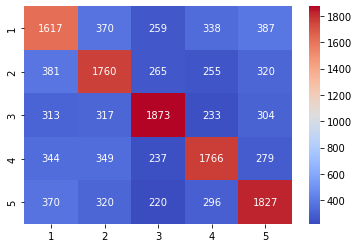

F1 Scores:
Class 1: F1 score = 0.5394
Class 2: F1 score = 0.5773
Class 3: F1 score = 0.6356
Class 4: F1 score = 0.6024
Class 5: F1 score = 0.5941


In [ ]:
clf = BayesClassifier(n=5)
clf.fit(X, y)

y_pred= clf.predict(X_test)
print("Classification Accuracy "+str(100*np.mean(y_pred == y_test)))
print("Confusion Matrix :")
get_confusion_matrix(y_test,y_pred)

print("F1 Scores:")
get_f1scores(y_test, y_pred)

## Laplacian Density


In [ ]:
from pandas.core.indexers import length_of_indexer
class Laplacian_model:

    def __init__(self):
        self.num_classes = None
        self.params = None
        self.prior = None
       

    def classesofdata(self,data,start):
        X = []
        for i in range(self.num_classes):
            t = data[data[:,-1]==i+start][:,0:-1]
            X.append(t)
        return X

    def MLE(self,data):
      
            med = np.median(data,axis = 0)
            std_array = np.zeros(data.shape[1])
            for i in range(data.shape[1]):
              b = np.mean(abs(data[:,i] - med[i]))
              std_array[i] = b

            return [med,std_array]


    def density(self,x,index):
        
            px = 1
            for i in range(len(x)):
              med = self.params[index][0][i]
              std = self.params[index][1][i]
              px *= (1/std)*np.exp(-abs(x[i]-med)/std)
            
            return px
      

    def Posterior_prob(self,x):
        post_prob = np.zeros(self.num_classes) 
        for i in range(self.num_classes):
            post_prob[i] = self.density(x,i)

        return post_prob*self.Bayes_prior



    def fit(self,data):
        uniqueclasses , count = np.unique(data[:,-1],return_counts = True)
        self.num_classes = len(uniqueclasses)
        minlabel = np.min(uniqueclasses)
       
        classesofdata = self.classesofdata(data,minlabel)
        self.params = []
        for i in range(self.num_classes):
            temp = self.MLE(classesofdata[i])
            self.params.append(temp)

        self.Bayes_prior = count/np.sum(count)

    def predict(self,XY):

        X = XY[:,0:-1] 
        leng = len(XY)
        y_pred = np.zeros(k)
        start = np.min(XY[:,-1])
        for i in range(leng):
            p = self.Posterior_prob(X[i])
            print(np.max(p))
            y_pred[i] = np.argmax(p) + start
  
        return y_pred


Classification Accuracy : 56.70666666666667
Confusion Matrix :


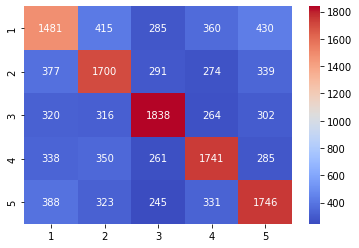

F1 Scores :
Class 1: F1 score = 0.5042
Class 2: F1 score = 0.5588
Class 3: F1 score = 0.6168
Class 4: F1 score = 0.5857
Class 5: F1 score = 0.5692


In [ ]:
Lap = Laplacian_model()
Lap.fit(train)
y_pred = Lap.predict(test).astype(int)
print("Classification Accuracy : "+str(100*np.mean(y_test == y_pred)))
print("Confusion Matrix :")
get_confusion_matrix(y_test,y_pred)

print("F1 Scores :")
get_f1scores(y_test,y_pred)

# 3b One Vs Rest

In [ ]:
train = np.loadtxt('/content/drive/MyDrive/p3_train.csv',delimiter = ',')
X = np.array(train[:,[0,1,2,3,4,5,6,7,8,9]])
y = np.array(train[:,10]).astype(int)

test = np.loadtxt('/content/drive/MyDrive/p3_test.csv',delimiter = ',')
X_test = np.array(test[:,[0,1,2,3,4,5,6,7,8,9]])
y_test = np.array(test[:,10]).astype(int)

In [ ]:
def augment_data(X):
    return np.column_stack((X,np.ones(X.shape[0])))
def sigmoid(x):
    return 1/(1+np.exp(-x))

In [ ]:
def risk(X,Y):
   return np.mean((X-Y)**2)

In [ ]:
def gradient_descent(X, y, step = 1e-5, e = 1e-2):
    W = np.zeros(X.shape[1]).reshape((X.shape[1],1))
    i = 0
    while(i == 0 or np.linalg.norm(gd)> e):
        XW = np.matmul(X,W)
        gd = (np.matmul(np.transpose(X), (1/(1+np.exp(-XW)) - y)))
        W  = W - step*gd
        i+=1
    return W

def get_weights(c, X,y):
    y_mod = np.copy(y)
    y_mod[y != c] = 0
    y_mod[y == c] = 1
    X_augmented = augment_data(X)
    
    W = gradient_descent(X_augmented, y_mod)
   
    return W

def linear_classifier(X,y):
    wts = {}
    unique_cls = len(np.unique(y))
    for clss in range(1,unique_cls+1):
        wts[str(clss)] = get_weights(clss, X, y)
    return wts


def onevsrest_predict(X_test, clsfr_wts, num_cls,start):
    y_pred = []
    y_pred_prob =[]
    n = X_test.shape[0]
    
    for i in range(n):
        x = X_test[i]
        likelihoods = []
        for j in range(1, num_cls+1):
           W_cls = clsfr_wts[str(j)]
           x = x.reshape(W_cls.shape)
           likelihoods.append(sigmoid(np.matmul(np.transpose(x),W_cls)))
        likelihoods  = np.array(likelihoods)
        
        y_pred.append(np.argmax(likelihoods)+start)
        y_pred_prob.append(np.max(likelihoods))

    
    y_pred = np.array(y_pred)
    y_pred_prob = np.array(y_pred_prob)
    return y_pred.reshape((y_pred.shape[0],1)), y_pred_prob.reshape((y_pred_prob.shape[0],1))

Classification Accuracy : 57.32000000000001
Confusion Matrix :


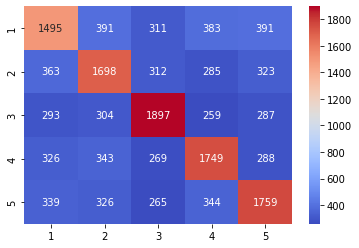

F1 Scores :
Class 1: F1 score = 0.5167
Class 2: F1 score = 0.5620
Class 3: F1 score = 0.6226
Class 4: F1 score = 0.5835
Class 5: F1 score = 0.5785


In [ ]:
y = y.reshape((y.shape[0],1))

y_test = y_test.reshape((y_test.shape[0],1))
wts = linear_classifier(X, y)

y_preds,y_preds_prob = onevsrest_predict(augment_data(X_test), wts,  5,1)

print("Classification Accuracy : " +str(100*np.mean(y_preds==y_test)))
print("Confusion Matrix :")
get_confusion_matrix(y_test,y_preds)

print("F1 Scores :")
get_f1scores(y_test, y_preds)

In [ ]:
y_test = y_test.reshape(y_test.shape[0])
y_preds_prob = y_preds_prob.reshape(y_preds_prob.shape[0])
roc_curve(y_test, y_preds_prob, 3,5)

## 3c Multi class Logistic Regression

In [ ]:
train = np.loadtxt('/content/drive/MyDrive/p3_train.csv',delimiter = ',')
X = np.array(train[:,[0,1,2,3,4,5,6,7,8,9]])
y = np.array(train[:,10]).astype(int)

test = np.loadtxt('/content/drive/MyDrive/p3_test.csv',delimiter = ',')
X_test = np.array(test[:,[0,1,2,3,4,5,6,7,8,9]])
y_test = np.array(test[:,10]).astype(int)

In [ ]:
def softmax(X):
    
    return np.transpose(np.transpose(np.exp(X))/np.sum(np.exp(X), axis = 1))

def one_hot(y):
    
    b = np.zeros((y.shape[0], int(np.max(y))))
    z= np.array(list(map(int, y))) 
    z = z - 1
    b[np.arange(y.shape[0]), z] = 1
    return b
    

In [ ]:
def logistic_regression(X, y, step = 1e-5, max_iter = 1000):
    W = np.zeros((X.shape[1], y.shape[1]))
    i = 0
    while(i < max_iter):
        XW = X.dot(W)
        gd = np.matmul(np.transpose(X), (softmax(XW) - y))
        W  = W - step*gd
        i+=1
    return W

def predict_logistic_regression(X_test, W, start):
    X_aug = augment_data(X_test)
    y_pred = np.argmax(X_aug@W, axis = 1)  + start
    return y_pred.reshape((y_pred.shape[0],1))

Classificaiton Accuracy - 57.32666666666667
Confusion Matrix :


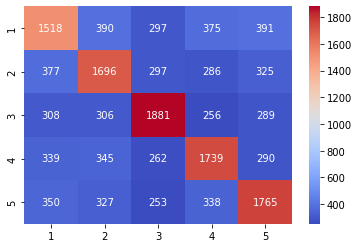

F1 Scores :
Class 1: F1 score = 0.5178
Class 2: F1 score = 0.5611
Class 3: F1 score = 0.6239
Class 4: F1 score = 0.5827
Class 5: F1 score = 0.5794


In [ ]:
y_train = y.reshape(y.shape[0])

X_train_aug = augment_data(X)
y_one_hot = one_hot(y_train)
W = logistic_regression(X_train_aug, y_one_hot)

y_pred = predict_logistic_regression(X_test,W,1)
y_pred = y_pred.reshape(y_pred.shape[0])

test_accuracy = 100*np.mean(y_pred == y_test)
print('\033[1m'+"Classificaiton Accuracy - {}".format(test_accuracy))
print("Confusion Matrix :")
get_confusion_matrix(y_test,y_pred)

print("F1 Scores :")
get_f1scores(y_test,y_pred)

In [ ]:
y_pred_train = predict_logistic_regression(X,W,1)
#print(y_train.shape)

y_pred_train = y_pred_train.reshape(y_pred_train.shape[0])
#print(y_pred_train.shape)
print(f"Emprical risk for Train Data : {risk(y_train,y_pred_train)}")
print(f"Emprical risk for Test Data : {risk(y_test,y_pred)}")

Emprical risk for Train Data : 2.3013
Emprical risk for Test Data : 2.2518666666666665


## 3a Gaussian Mixture Density

In [ ]:
train = np.loadtxt('/content/drive/MyDrive/p3_train.csv',delimiter = ',')
X = np.array(train[:,[0,1,2,3,4,5,6,7,8,9]])
y = np.array(train[:,10]).astype(int)

test = np.loadtxt('/content/drive/MyDrive/p3_test.csv',delimiter = ',')
X_test = np.array(train[:,[0,1,2,3,4,5,6,7,8,9]])
y_test = np.array(train[:,10]).astype(int)

In [35]:
def class_conditionals(X,y):
    unique_cls = np.unique(y)
    class_cond = {}
    for cls in unique_cls:
        class_cond[str(int(cls))] = X[y == cls]
    return class_cond

def prior_probs(X, y):
    unique_cls = np.unique(y)
    n = y.shape[0]
    priors = {}
    for cls in unique_cls:
        priors[str(int(cls))] = X[str(int(cls))].shape[0]/n
    return priors
    
def normal_density(x, mean, cov_mat):
    A = x-mean
    cov_inv = np.linalg.inv(cov_mat)
    At = np.transpose(A)

    pow = ((-1)*np.matmul(At, np.matmul(cov_inv,A)))/2
#     print(pow.shape)
    d_ = np.linalg.det(cov_mat)**(0.5)
    l = (2*np.pi)**(x.shape[0]/2)
    c = 1/(d_*l)
    density = c*np.exp(pow)
#     print('density-', density.shape)
    return density    

In [ ]:
def e_step(X, gamma, means, covs, weights, num_comp):
    n = X.shape[0]
    for i in range(n):
        for k in range(num_comp):
            prior = weights[k]
            likelihood = normal_density(X[i].reshape(-1,1), means[k].reshape(-1,1), covs[k])
            gamma[i][k] = prior * likelihood

    
    log_likelihood = np.sum(np.log(np.sum(gamma, axis = 1)))
    #print(log_likelihood)
    gamma = gamma / gamma.sum(axis = 1, keepdims = 1)
    
    return gamma, log_likelihood
     
def max_step(X, gamma, means, covs, weights, num_comp):

    gamma_ws = gamma.sum(axis = 0)

    # weights update
    weights = gamma_ws / X.shape[0]

    # means update
   
    means = (np.dot(gamma.T, X)) / gamma_ws.reshape(-1, 1)
    
    # Update sigma
    n = X.shape[0]
    for i in range(num_comp):
        x_ = np.transpose(X) - means[i].reshape(-1,1)
        covs[i] = np.diag((np.sum(gamma[:, i] * x_ ** 2, axis=1) / gamma[:, i].sum()))
    
    return weights, means, covs
        

In [ ]:
def init_gmm(X, num_comp, e = 1):
    gamma = np.zeros((X.shape[0], num_comp))
    
    ## Initializing parameters
    means = []
    covariances = []
    for i in range(num_comp):
        means.append(np.random.rand(X.shape[1],1))
        covariances.append(np.diag(np.random.rand(X.shape[1])))
  
    weights = np.random.rand(num_comp,1)
    weights = weights/np.sum(weights)
    means = np.array(means)
    covariances = np.array(covariances)
    
    
    
    i = 0
    log_likelihood = 0
    log_likelihood_trace = [] 
    
    while(i == 0 or log_diff > e):
        gamma, log_likelihood_new = e_step(X, gamma, means, covariances, weights, num_comp)
        
        weights, means, covariances = max_step(X, gamma, means, covariances, weights, num_comp)
        
        log_diff = abs(log_likelihood_new - log_likelihood)
        log_likelihood = log_likelihood_new
        log_likelihood_trace.append(log_likelihood)
        
        i+=1
    
    return log_likelihood_trace, weights, means, covariances
        

In [ ]:
def get_gmm_estimates(X_class_cond,y, num_comp):
    unique_classes = np.unique(y)
    means= {}
    covs = {}
    weights = {}
    log_likelihoods = []
    for cls in unique_classes:
        Log_trace, weights[str(int(cls))], means[str(int(cls))],covs[str(int(cls))] = init_gmm(X_class_cond[str(int(cls))],num_comp)
        log_likelihoods.append(Log_trace[len(Log_trace)-1])
        
    return log_likelihoods, weights, means, covs

def mixture_density(x, means, weights, covs, num_comp):
    mix_des = 0
    for k in range(num_comp):
        mix_des += weights[k]*normal_density(x.reshape(-1,1), means[k].reshape(-1,1), covs[k])
    return mix_des

def predicted_class(x, priors, means, covs, weights, num_comp, num_classes = 5):
    classes = list(range(1, num_classes+1))
    posterior_max = -1*np.inf
    pred_class = 0
    classes = list(range(1, num_classes+1))
    for cls in classes:
        cls_post = priors[str(cls)]*mixture_density(x, means[str(cls)], weights[str(cls)], covs[str(cls)], num_comp)
        if(cls_post > posterior_max):
            posterior_max = cls_post
            pred_class = cls
    return pred_class

def predict_gmm(X_test, priors, means, covs, weights,  num_classes = 5, n_comp = 4):
    y_pred = []
    n = X_test.shape[0]
    
    for i in range(n):
        y_pred.append(predicted_class(X_test[i], priors, means, covs, weights, n_comp, num_classes))
    
    y_pred = np.array(y_pred)
    return y_pred.reshape((y_pred.shape[0],1))

In [ ]:
y = y.reshape(y.shape[0])
X_class_cond = class_conditionals(X, y)

priors = prior_probs(X_class_cond,y)
log_likelihoods, wts, m, c = get_gmm_estimates(X_class_cond, y,4)

In [ ]:
y_preds = predict_gmm(X_test, priors, m, c, wts)
y_test = y_test.reshape(y_test.shape[0],1)


Classification Accuracy : 59.41333333333333
Confusion Matrix :


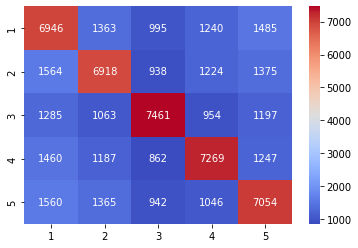

F1 Scores :
Class 1: F1 score = 0.5592
Class 2: F1 score = 0.5785
Class 3: F1 score = 0.6444
Class 4: F1 score = 0.6119
Class 5: F1 score = 0.5800


In [ ]:
print("Classification Accuracy : "+str(100*np.mean(y_test == y_preds)))
print("Confusion Matrix :")
get_confusion_matrix(y_test,y_preds)

print("F1 Scores :")
get_f1scores(y_test,y_preds)

In [ ]:
def likelihood_curve(X,y):
  likelihood = []
  mix_num = []
  y = y.reshape(y.shape[0])
  X_class_cond = class_conditionals(X, y)
  priors = prior_probs(X_class_cond,y)
  for i in range(2,5):

    log_likelihoods, wts, m, c = get_gmm_estimates(X_class_cond, y,i)
    like = np.sum(log_likelihoods)
    print(like)
    likelihood.append(like)
    mix_num.append(i)

  plt.plot(mix_num, likelihood,color = 'green')
  plt.xlabel('No of Mixtures')
  plt.ylabel('Log Likelihood')
  plt.title('Likelihood curve for EM with number of mixtures')
  plt.show()

-937247.6532944818
-936781.5811766775
-936601.6164462827


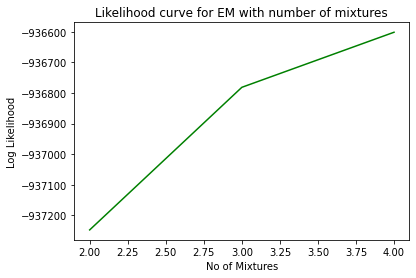

In [ ]:
likelihood_curve(X,y)

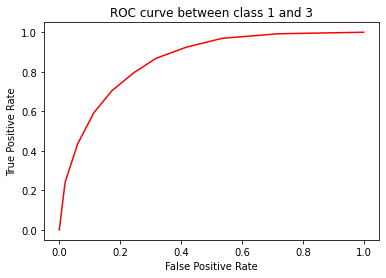

In [ ]:
roc_curve(train,test,1,3)

# P4

In [ ]:
import os
import matplotlib.pyplot as pyplt

In [ ]:
!unzip /content/drive/MyDrive/Assignment1_resized_images.zip -d /content/drive/MyDrive/

Streaming output truncated to the last 5000 lines.
  inflating: /content/drive/MyDrive/Assignment1_resized_images/9/image_19009.png  
  inflating: /content/drive/MyDrive/Assignment1_resized_images/9/image_19019.png  
  inflating: /content/drive/MyDrive/Assignment1_resized_images/9/image_19029.png  
  inflating: /content/drive/MyDrive/Assignment1_resized_images/9/image_19039.png  
  inflating: /content/drive/MyDrive/Assignment1_resized_images/9/image_19049.png  
  inflating: /content/drive/MyDrive/Assignment1_resized_images/9/image_19059.png  
  inflating: /content/drive/MyDrive/Assignment1_resized_images/9/image_19069.png  
  inflating: /content/drive/MyDrive/Assignment1_resized_images/9/image_19079.png  
  inflating: /content/drive/MyDrive/Assignment1_resized_images/9/image_19089.png  
  inflating: /content/drive/MyDrive/Assignment1_resized_images/9/image_1909.png  
  inflating: /content/drive/MyDrive/Assignment1_resized_images/9/image_19099.png  
  inflating: /content/drive/MyDrive/A

In [ ]:
dir = '/content/drive/MyDrive/Assignment1_resized_images'
X = []
y = []
i=0
for foldername in os.listdir(dir):
        if os.path.isdir(os.path.join(dir, foldername)):
            label = int(foldername) 
            for filename in os.listdir(os.path.join(dir, foldername)):
                
                image = pyplt.imread(os.path.join(dir, foldername, filename))
                X.append(image.flatten())
                y.append(label)

X = np.array(X)
y = np.array(y)
print(X[0].shape)   

(784,)


In [ ]:
print(X.shape)

(60000, 784)


In [19]:
def split_data(X,y,i):
   np.random.seed(42)
   indices = np.random.permutation(X.shape[0])

# Use the first 80% of the shuffled indices for training and the rest for testing
   train_indices, test_indices = indices[:int(i * len(indices))], indices[int(i * len(indices)):]

# Use the shuffled indices to split the data into training and testing sets
   X_train, X_test = X[train_indices], X[test_indices]
   y_train, y_test = y[train_indices], y[test_indices]
   return X_train,y_train,X_test,y_test

# 4a Naive Bayes 

In [ ]:
import numpy as np

class NaiveBayesClassifier:
    def __init__(self, num_classes, num_features):
        self.num_classes = num_classes
        self.num_features = num_features
        self.mean = np.zeros((num_classes, num_features))
        self.variance = np.zeros((num_classes, num_features))
        self.prior = np.zeros(num_classes)

    def fit(self, X_train, y_train):
        # calculate class prior
        for i in range(self.num_classes):
            self.prior[i] = np.mean(y_train == i)

        # calculate mean and variance for each feature in each class
        for i in range(self.num_classes):
            X_class = X_train[y_train == i]
            self.mean[i] = np.mean(X_class, axis=0)
            #print(self.mean[i])
            var = np.var(X_class, axis=0)
            if (np.all(var)>0) :
              self.variance[i] = var
            else:
              self.variance[i] = 1  

            #print(self.variance[i])

    def predict(self, X_test):
        # calculate likelihood for each class and each test example
        likelihood = np.zeros((self.num_classes, X_test.shape[0]))
        for i in range(self.num_classes):
            # calculate likelihood for each feature in each class
            likelihood[i] = np.prod(np.exp(-1 * (X_test - self.mean[i]) ** 2 / (2 * self.variance[i])) / np.sqrt(2 * np.pi * self.variance[i]), axis=1)

        # calculate posterior for each test example and choose the class with the highest probability
        posterior = likelihood * self.prior.reshape(-1, 1)

        return np.argmax(posterior, axis=0),np.max(posterior, axis=0)


Metrics for 20.0 Train 80.0 Test Data :
Classification Accuracy : 85.72708333333333
Confusion Matrix :


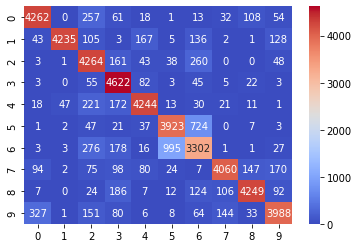

F1 Scores :
Class 0: F1 score = 0.8562
Class 1: F1 score = 0.8910
Class 2: F1 score = 0.9291
Class 3: F1 score = 0.8285
Class 4: F1 score = 0.8870
Class 5: F1 score = 0.8955
Class 6: F1 score = 0.8017
Class 7: F1 score = 0.6946
Class 8: F1 score = 0.8896
Class 9: F1 score = 0.9054
Metrics for 30.0 Train 70.0 Test Data :
Classification Accuracy : 85.85238095238095
Confusion Matrix :


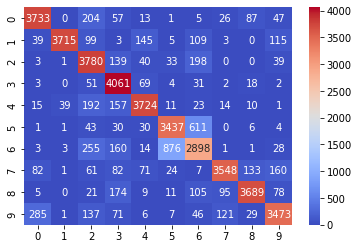

F1 Scores :
Class 0: F1 score = 0.8551
Class 1: F1 score = 0.8950
Class 2: F1 score = 0.9294
Class 3: F1 score = 0.8330
Class 4: F1 score = 0.8852
Class 5: F1 score = 0.8966
Class 6: F1 score = 0.8019
Class 7: F1 score = 0.7007
Class 8: F1 score = 0.8893
Class 9: F1 score = 0.9042
Metrics for 50.0 Train 50.0 Test Data :
Classification Accuracy : 85.84
Confusion Matrix :


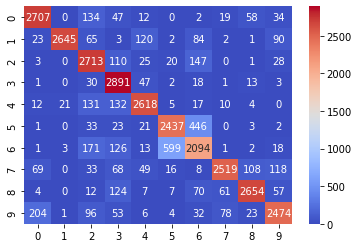

F1 Scores :
Class 0: F1 score = 0.8538
Class 1: F1 score = 0.8967
Class 2: F1 score = 0.9273
Class 3: F1 score = 0.8393
Class 4: F1 score = 0.8783
Class 5: F1 score = 0.8923
Class 6: F1 score = 0.8046
Class 7: F1 score = 0.7043
Class 8: F1 score = 0.8871
Class 9: F1 score = 0.9053
Metrics for 70.0 Train 30.000000000000004 Test Data :
Classification Accuracy : 85.58888888888889
Confusion Matrix :


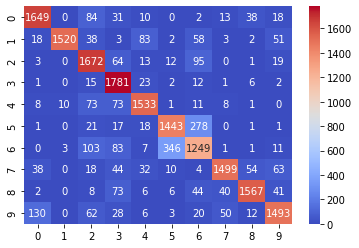

F1 Scores :
Class 0: F1 score = 0.8524
Class 1: F1 score = 0.8926
Class 2: F1 score = 0.9182
Class 3: F1 score = 0.8417
Class 4: F1 score = 0.8817
Class 5: F1 score = 0.8890
Class 6: F1 score = 0.8006
Class 7: F1 score = 0.6984
Class 8: F1 score = 0.8878
Class 9: F1 score = 0.9032
Metrics for 90.0 Train 9.999999999999998 Test Data :
Classification Accuracy : 85.83333333333333
Confusion Matrix :


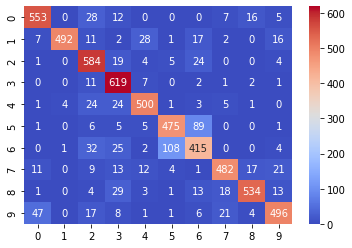

F1 Scores :
Class 0: F1 score = 0.8537
Class 1: F1 score = 0.8898
Class 2: F1 score = 0.9171
Class 3: F1 score = 0.8544
Class 4: F1 score = 0.8849
Class 5: F1 score = 0.8889
Class 6: F1 score = 0.8065
Class 7: F1 score = 0.7174
Class 8: F1 score = 0.8716
Class 9: F1 score = 0.8975


In [ ]:
clf = NaiveBayesClassifier(num_classes = 10, num_features = 784)
split_ratios = [0.2,0.3,0.5,0.7,0.9]
for i in split_ratios:
  X_train,y_train,X_test,y_test = split_data(X,y,i)
  clf.fit(X_train, y_train)
  y_pred = clf.predict(X_test)
  print(f'Metrics for {i*100} Train {(1-i)*100} Test Data :')
  print("Classification Accuracy : "+str(100*np.mean(y_test == y_pred)))
  print("Confusion Matrix :")
  get_confusion_matrix(y_test,y_pred)
#print(confusion_matrix)
  print("F1 Scores :")
  get_f1scores(y_test,y_pred)
  

In [ ]:
clf = NaiveBayesClassifier(num_classes = 10, num_features = 784)
X_train,y_train,X_test,y_test = split_data(X,y,0.5)
clf.fit(X_train, y_train)
y_pred,y_prob = clf.predict(X_test)

In [ ]:
print(np.max(y_prob)) #probability values are very small

1.857740173e-315


(5979,)
(5979,)


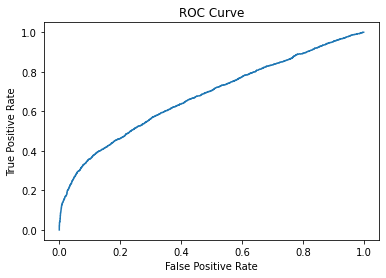

In [ ]:
roc_curve(y_test, y_prob,4,9)

## 4b Logistic Regression

Metrics for 20.0 Train 80.0 Test data :
Classificaiton Accuracy - 82.26875
Confusion Matrix :


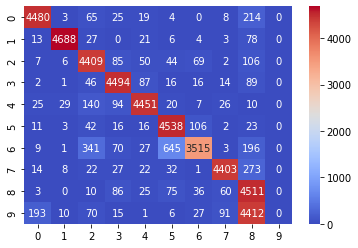

F1 Scores :
Class 0: F1 score = nan
Class 1: F1 score = 0.9358
Class 2: F1 score = 0.9778
Class 3: F1 score = 0.8862
Class 4: F1 score = 0.9288
Class 5: F1 score = 0.9350
Class 6: F1 score = 0.8948
Class 7: F1 score = 0.8186
Class 8: F1 score = 0.9354
Class 9: F1 score = 0.6130


<ipython-input-130-cbb63cb571c1>:9: RuntimeWarning: invalid value encountered in long_scalars
  precision = tp / (tp + fp)


Metrics for 30.0 Train 70.0 Test data :
Classificaiton Accuracy - 78.39285714285714
Confusion Matrix :


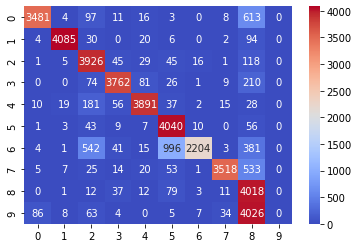

F1 Scores :
Class 0: F1 score = nan
Class 1: F1 score = 0.8897
Class 2: F1 score = 0.9756
Class 3: F1 score = 0.8554
Class 4: F1 score = 0.9241
Class 5: F1 score = 0.9342
Class 6: F1 score = 0.8542
Class 7: F1 score = 0.6854
Class 8: F1 score = 0.9047
Class 9: F1 score = 0.5639
Metrics for 50.0 Train 50.0 Test data :
Classificaiton Accuracy - 78.91
Confusion Matrix :


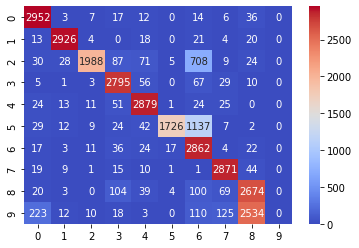

F1 Scores :
Class 0: F1 score = nan
Class 1: F1 score = 0.9255
Class 2: F1 score = 0.9727
Class 3: F1 score = 0.7962
Class 4: F1 score = 0.9144
Class 5: F1 score = 0.9314
Class 6: F1 score = 0.7280
Class 7: F1 score = 0.7119
Class 8: F1 score = 0.9382
Class 9: F1 score = 0.6383
Metrics for 70.0 Train 30.000000000000004 Test data :
Classificaiton Accuracy - 77.04444444444445
Confusion Matrix :


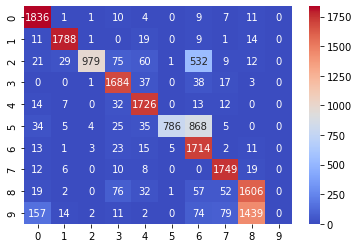

F1 Scores :
Class 0: F1 score = nan
Class 1: F1 score = 0.9189
Class 2: F1 score = 0.9675
Class 3: F1 score = 0.7228
Class 4: F1 score = 0.9039
Class 5: F1 score = 0.9225
Class 6: F1 score = 0.6153
Class 7: F1 score = 0.6720
Class 8: F1 score = 0.9360
Class 9: F1 score = 0.6476
Metrics for 90.0 Train 9.999999999999998 Test data :
Classificaiton Accuracy - 74.3
Confusion Matrix :


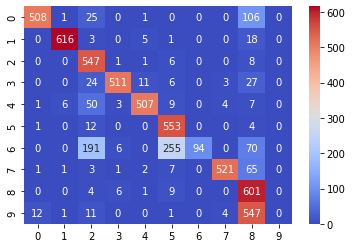

F1 Scores :
Class 0: F1 score = nan
Class 1: F1 score = 0.8729
Class 2: F1 score = 0.9716
Class 3: F1 score = 0.7634
Class 4: F1 score = 0.9207
Class 5: F1 score = 0.9094
Class 6: F1 score = 0.7805
Class 7: F1 score = 0.2648
Class 8: F1 score = 0.9197
Class 9: F1 score = 0.5796


In [ ]:
split_ratios = [0.2,0.3,0.5,0.7,0.9]
for i in split_ratios:
  X_train,y_train,X_test,y_test = split_data(X,y,i)
  y_train = y_train.reshape(y_train.shape[0])

  X_train_aug = augment_data(X_train)
  y_one_hot = one_hot(y_train)
  #print(X_train_aug.shape)
  #print(y_one_hot.shape)
  W = logistic_regression(X_train_aug, y_one_hot)

  y_pred = predict_logistic_regression(X_test,W,1)
  y_pred = y_pred.reshape(y_pred.shape[0])
 
  test_accuracy = 100*np.mean(y_pred == y_test)
  print(f'Metrics for {i*100} Train {(1-i)*100} Test data :')
  print('\033[1m'+"Classificaiton Accuracy - {}".format(test_accuracy))
  print("Confusion Matrix :")
  get_confusion_matrix(y_test,y_pred)
  
  print("F1 Scores :")
  get_f1scores(y_test,y_pred)
  

In [ ]:
X_train,y_train,X_test,y_test = split_data(X,y,0.2)
y_train = y_train.reshape(y_train.shape[0])

X_train_aug = augment_data(X_train)
y_one_hot = one_hot(y_train)
  #print(X_train_aug.shape)
  #print(y_one_hot.shape)
W = logistic_regression(X_train_aug, y_one_hot)
y_pred = predict_logistic_regression(X_test,W,1)
y_pred = y_pred.reshape(y_pred.shape[0])

y_pred_train = predict_logistic_regression(X_train,W,1)
#print(y_train.shape)

y_pred_train = y_pred_train.reshape(y_pred_train.shape[0])

In [ ]:
print(f"Emprical risk for Train Data : {risk(y_train,y_pred_train)}")
print(f"Emprical risk for Test Data : {risk(y_test,y_pred)}")

Emprical risk for Train Data : 8.303916666666666
Emprical risk for Test Data : 8.563875


## 4c GMM


In [10]:
def class_conditionals(X,y):
    classes = np.unique(y)
    X_class_cond = {}
    for class_ in classes:
        X_class_cond[str(int(class_))] = X[y == class_]
    return X_class_cond

def prior_probs(X, y):
    classes = np.unique(y)
    n = y.shape[0]
    prior_probabilities = {}
    for class_ in classes:
        prior_probabilities[str(int(class_))] = X[str(int(class_))].shape[0]/n
    return prior_probabilities

def get_normal_density(x, mean, cov_mat):
    A = x-mean
    cov_inv = cov_mat
    At = np.transpose(A)
#     print('x_u_t-',x_u_t.shape)
#     print('x_u-',x_u.shape)
#     print('cov_mat-',cov_mat_inv.shape)
    expo = ((-1)*np.matmul(At, np.matmul(cov_inv,A)))/2
#    
    density = np.exp(expo)
    #print(density)
#     print('density-', density.shape)
    return density

In [11]:
def e_step(X, resp, means, covs, weights, n_components):
    n = X.shape[0]
    for i in range(n):
        for k in range(n_components):
            prior = weights[k]
            likelihood = get_normal_density(X[i].reshape(-1,1), means[k].reshape(-1,1), covs[k])
            resp[i][k] = prior * likelihood
    
    log_likelihood = np.sum(np.log(np.sum(resp, axis = 1)))
    resp = resp / resp.sum(axis = 1, keepdims = 1)
    
    return resp, log_likelihood
     
def m_step(X, resp, means, covs, weights, n_components):

    resp_weights = resp.sum(axis = 0)

    # weights update
    weights = resp_weights / X.shape[0]

    # means update
    weighted_sum = np.dot(resp.T, X)
    means = weighted_sum / resp_weights.reshape(-1, 1)
    
    # Update sigma
    #n = X.shape[0]
    #for k in range(n_components):
        #x_shifted = np.transpose(X) - means[k].reshape(-1,1)

        #covs[k] = np.diag((np.sum(resp[:, k] * x_shifted ** 2, axis=1) / resp[:, k].sum()))
    
    return weights, means, covs
        

In [12]:
def gmm_params(X, num_comp, e = 1):
    resp = np.zeros((X.shape[0], num_comp))
    
    ## Initializing parameters
    means = []
    covs = []
    for i in range(num_comp):
        means.append(np.random.rand(X.shape[1],1))
        covs.append(np.identity(X.shape[1], dtype = "int"))
   
    weights = np.random.rand(num_comp,1)
    weights = weights/np.sum(weights)
    means = np.array(means)
    covs = np.array(covs)
    
    log_likelihood = 0
    log_likelihood_trace = [] 
    
    i = 0
    
    while(i == 0 or log_diff > e):
        resp, log_likelihood_new = e_step(X, resp, means, covs, weights, num_comp)
        
        weights, means, covs = m_step(X, resp, means, covs, weights, num_comp)
        
        log_diff = abs(log_likelihood_new - log_likelihood)
        log_likelihood = log_likelihood_new
        log_likelihood_trace.append(log_likelihood)
        
        i+=1
    
    return log_likelihood_trace, weights, means, covs
        

In [13]:
def get_gmm_estimates(X_class_cond,y,num_comp):
    unique_classes = np.unique(y)
    means = {}
    covs = {}
    weights = {}
    log_likelihood = []
    for cls in unique_classes:
        log_trace, weights[str(int(cls))], means[str(int(cls))],covs[str(int(cls))] = gmm_params(X_class_cond[str(int(cls))],num_comp)
        log_likelihood.append(log_trace[len(log_trace)-1])
    return log_likelihood, weights, means, covs

def mixdensity(x, means, covs, weights, n_comp):
    density = 0
    for k in range(n_comp):
        density += weights[k]*get_normal_density(x.reshape(-1,1), means[k].reshape(-1,1), covs[k])
    return density

def get_predicted_class_gmm(x, prior_probabilities, means, covs, weights, n_comp, num_classes = 10):
    unique_classes = list(range(0, num_classes))
    max_posterior = -1*np.inf
    pred_class = 0
    for cls in unique_classes:
        curr_class_post = prior_probabilities[str(cls)]*mixdensity(x, means[str(cls)], covs[str(cls)], weights[str(cls)], n_comp)
        if(curr_class_post > max_posterior):
            max_posterior = curr_class_post
            pred_class = cls
    return pred_class

def get_predictions_gmm(X_test, priors, means, covs, weights,  num_classes = 10, n_comp = 4):
    y_pred = []
    n = X_test.shape[0]
    
    for i in range(n):
        y_pred.append(get_predicted_class_gmm(X_test[i], priors, means, covs, weights, n_comp, num_classes))
    
    y_pred = np.array(y_pred)
    return y_pred.reshape((y_pred.shape[0],1))

In [ ]:

X_train,y_train,X_test,y_test = split_data(X,y,0.2)
y_train = y_train.reshape(y_train.shape[0])
X_class_cond = class_conditionals(X_train, y_train)

prior_probabilities = prior_probs(X_class_cond,y_train)
_, wts, m, c = get_gmm_estimates(X_class_cond, y_train)


KeyboardInterrupt: ignored

## P5

## 5a Naive Bayes

In [17]:
train = np.loadtxt('/content/drive/MyDrive/PCA_MNIST.csv',delimiter = ',', skiprows=1)
X = np.array(train[:,[1,2,3,4,5,6,7,8,9,10]])
y = np.array(train[:,0]).astype(int)
split_ratios = [0.2,0.3,0.5,0.7,0.9]

Metrics for 20.0 Train 80.0 Test Data :
Classification Accuracy : 86.60833333333333
Confusion Matrix :


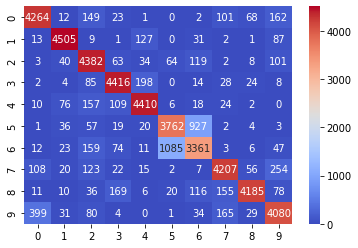

F1 Scores :
Class 0: F1 score = 0.8462
Class 1: F1 score = 0.8879
Class 2: F1 score = 0.9451
Class 3: F1 score = 0.8718
Class 4: F1 score = 0.9125
Class 5: F1 score = 0.9155
Class 6: F1 score = 0.7700
Class 7: F1 score = 0.7143
Class 8: F1 score = 0.8854
Class 9: F1 score = 0.9129
Metrics for 30.0 Train 70.0 Test Data :
Classification Accuracy : 86.79285714285714
Confusion Matrix :


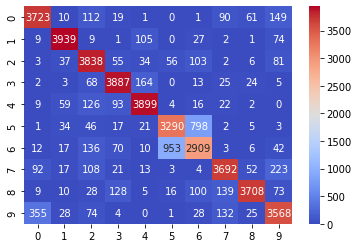

F1 Scores :
Class 0: F1 score = 0.8462
Class 1: F1 score = 0.8884
Class 2: F1 score = 0.9468
Class 3: F1 score = 0.8763
Class 4: F1 score = 0.9161
Class 5: F1 score = 0.9194
Class 6: F1 score = 0.7705
Class 7: F1 score = 0.7133
Class 8: F1 score = 0.8860
Class 9: F1 score = 0.9149
Metrics for 50.0 Train 50.0 Test Data :
Classification Accuracy : 86.97
Confusion Matrix :


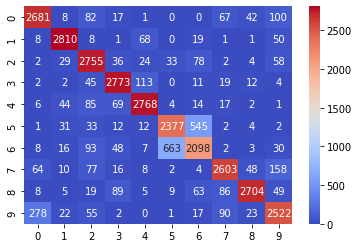

F1 Scores :
Class 0: F1 score = 0.8429
Class 1: F1 score = 0.8854
Class 2: F1 score = 0.9457
Class 3: F1 score = 0.8784
Class 4: F1 score = 0.9176
Class 5: F1 score = 0.9202
Class 6: F1 score = 0.7783
Class 7: F1 score = 0.7213
Class 8: F1 score = 0.8855
Class 9: F1 score = 0.9197
Metrics for 70.0 Train 30.000000000000004 Test Data :
Classification Accuracy : 86.83333333333333
Confusion Matrix :


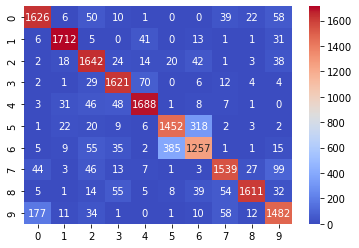

F1 Scores :
Class 0: F1 score = 0.8356
Class 1: F1 score = 0.8830
Class 2: F1 score = 0.9448
Class 3: F1 score = 0.8769
Class 4: F1 score = 0.9094
Class 5: F1 score = 0.9206
Class 6: F1 score = 0.7842
Class 7: F1 score = 0.7264
Class 8: F1 score = 0.8804
Class 9: F1 score = 0.9182
Metrics for 90.0 Train 9.999999999999998 Test Data :
Classification Accuracy : 86.9
Confusion Matrix :


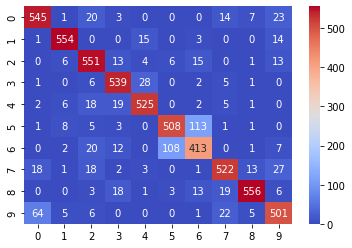

F1 Scores :
Class 0: F1 score = 0.8385
Class 1: F1 score = 0.8755
Class 2: F1 score = 0.9470
Class 3: F1 score = 0.8774
Class 4: F1 score = 0.9051
Class 5: F1 score = 0.9099
Class 6: F1 score = 0.8032
Class 7: F1 score = 0.7336
Class 8: F1 score = 0.8751
Class 9: F1 score = 0.9228


In [ ]:
clf = NaiveBayesClassifier(num_classes = 10, num_features = 10)

for i in split_ratios:
  X_train,y_train,X_test,y_test = split_data(X,y,i)
  clf.fit(X_train, y_train)
  y_pred = clf.predict(X_test)
  print(f'Metrics for {i*100} Train {(1-i)*100} Test Data :')
  print("Classification Accuracy : "+str(100*np.mean(y_test == y_pred)))
  print("Confusion Matrix :")
  get_confusion_matrix(y_test,y_pred)
#print(confusion_matrix)
  print("F1 Scores :")
  get_f1scores(y_test,y_pred)
  

## 5b Logistic Regression

In [21]:
def minmaxNormalize(X):
    X_norm = np.zeros(X.shape)
    for i in range(X.shape[1]):
        if np.max(X[:,i]) != 0:
            X_norm[:,i] = (X[:,i] - np.min(X[:,i])) / (np.max(X[:,i]) - np.min(X[:,i]))
    return X_norm

Metrics for 20.0 Train 80.0 Test data :
Classificaiton Accuracy - 74.08958333333334
Confusion Matrix :


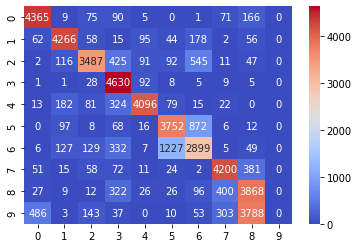

F1 Scores :
Class 0: F1 score = nan
Class 1: F1 score = 0.8913
Class 2: F1 score = 0.8887
Class 3: F1 score = 0.7840
Class 4: F1 score = 0.8347
Class 5: F1 score = 0.8855
Class 6: F1 score = 0.7435
Class 7: F1 score = 0.6137
Class 8: F1 score = 0.8534
Class 9: F1 score = 0.5879


<ipython-input-6-cbb63cb571c1>:9: RuntimeWarning: invalid value encountered in long_scalars
  precision = tp / (tp + fp)


Metrics for 30.0 Train 70.0 Test data :
Classificaiton Accuracy - 74.39523809523808
Confusion Matrix :


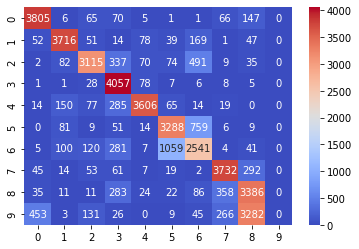

F1 Scores :
Class 0: F1 score = nan
Class 1: F1 score = 0.8872
Class 2: F1 score = 0.8921
Class 3: F1 score = 0.7911
Class 4: F1 score = 0.8403
Class 5: F1 score = 0.8883
Class 6: F1 score = 0.7473
Class 7: F1 score = 0.6144
Class 8: F1 score = 0.8585
Class 9: F1 score = 0.5909
Metrics for 50.0 Train 50.0 Test data :
Classificaiton Accuracy - 75.09
Confusion Matrix :


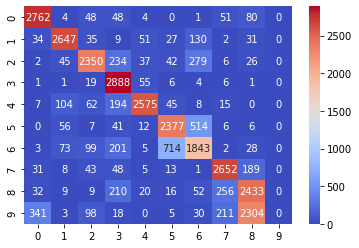

F1 Scores :
Class 0: F1 score = nan
Class 1: F1 score = 0.8894
Class 2: F1 score = 0.8949
Class 3: F1 score = 0.8116
Class 4: F1 score = 0.8405
Class 5: F1 score = 0.8919
Class 6: F1 score = 0.7589
Class 7: F1 score = 0.6322
Class 8: F1 score = 0.8559
Class 9: F1 score = 0.5982
Metrics for 70.0 Train 30.000000000000004 Test data :
Classificaiton Accuracy - 75.22222222222223
Confusion Matrix :


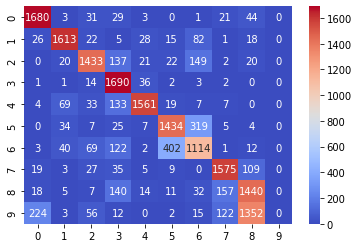

F1 Scores :
Class 0: F1 score = nan
Class 1: F1 score = 0.8872
Class 2: F1 score = 0.8959
Class 3: F1 score = 0.8182
Class 4: F1 score = 0.8290
Class 5: F1 score = 0.8895
Class 6: F1 score = 0.7646
Class 7: F1 score = 0.6389
Class 8: F1 score = 0.8571
Class 9: F1 score = 0.5971
Metrics for 90.0 Train 9.999999999999998 Test data :
Classificaiton Accuracy - 75.36666666666667
Confusion Matrix :


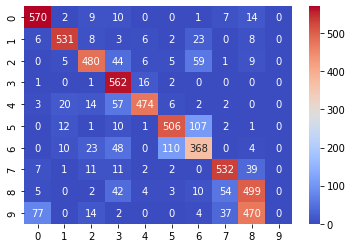

F1 Scores :
Class 0: F1 score = nan
Class 1: F1 score = 0.8892
Class 2: F1 score = 0.9092
Class 3: F1 score = 0.8191
Class 4: F1 score = 0.8198
Class 5: F1 score = 0.8721
Class 6: F1 score = 0.7931
Class 7: F1 score = 0.6473
Class 8: F1 score = 0.8581
Class 9: F1 score = 0.6001


In [ ]:
for i in split_ratios:
  X_train,y_train,X_test,y_test = split_data(X,y,i)
  y_train = y_train.reshape(y_train.shape[0])
  X_train = minmaxNormalize(X_train)
  X_train_aug = augment_data(X_train)
  y_one_hot = one_hot(y_train)
  #print(X_train_aug.shape)
  #print(y_one_hot.shape)
  W =logistic_regression(X_train_aug, y_one_hot)

  y_pred = predict_logistic_regression(X_test,W,0)
  y_pred = y_pred.reshape(y_pred.shape[0])
  test_accuracy = 100*np.mean(y_pred == y_test)
  print(f'Metrics for {i*100} Train {(1-i)*100} Test data :')
  print('\033[1m'+"Classificaiton Accuracy - {}".format(test_accuracy))
  print("Confusion Matrix :")
  get_confusion_matrix(y_test,y_pred)
  
  print("F1 Scores :")
  get_f1scores(y_test,y_pred)

In [ ]:
X_train,y_train,X_test,y_test = split_data(X,y,0.2)
y_train = y_train.reshape(y_train.shape[0])
X_train = minmaxNormalize(X_train)
X_test = minmaxNormalize(X_test)
X_train_aug = augment_data(X_train)
y_one_hot = one_hot(y_train)
  #print(X_train_aug.shape)
  #print(y_one_hot.shape)
W = logistic_regression(X_train_aug, y_one_hot)
y_pred = predict_logistic_regression(X_test,W,1)
y_pred = y_pred.reshape(y_pred.shape[0])

y_pred_train = predict_logistic_regression(X_train,W,1)
#print(y_train.shape)

y_pred_train = y_pred_train.reshape(y_pred_train.shape[0])
print(f"Emprical risk for Train Data : {risk(y_train,y_pred_train)}")
print(f"Emprical risk for Test Data : {risk(y_test,y_pred)}")

Emprical risk for Train Data : 11.752333333333333
Emprical risk for Test Data : 13.359333333333334


## 5c GMM

Metrics for 20.0 Train 80.0 Test data :
Classificaiton Accuracy - 78.49583333333334
Confusion Matrix :


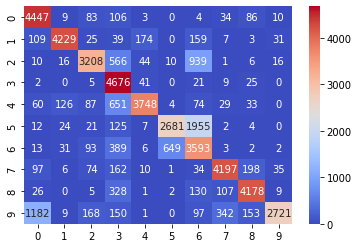

F1 Scores :
Class 0: F1 score = 0.7117
Class 1: F1 score = 0.8281
Class 2: F1 score = 0.9168
Class 3: F1 score = 0.7474
Class 4: F1 score = 0.7812
Class 5: F1 score = 0.8473
Class 6: F1 score = 0.6557
Class 7: F1 score = 0.6097
Class 8: F1 score = 0.8794
Class 9: F1 score = 0.8820
Metrics for 30.0 Train 70.0 Test data :
Classificaiton Accuracy - 78.28333333333333
Confusion Matrix :


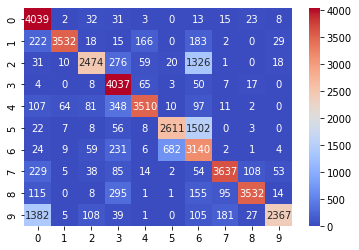

F1 Scores :
Class 0: F1 score = 0.7057
Class 1: F1 score = 0.7812
Class 2: F1 score = 0.9055
Class 3: F1 score = 0.7019
Class 4: F1 score = 0.8407
Class 5: F1 score = 0.8706
Class 6: F1 score = 0.6920
Class 7: F1 score = 0.5824
Class 8: F1 score = 0.8897
Class 9: F1 score = 0.8909
Metrics for 50.0 Train 50.0 Test data :
Classificaiton Accuracy - 79.95333333333333
Confusion Matrix :


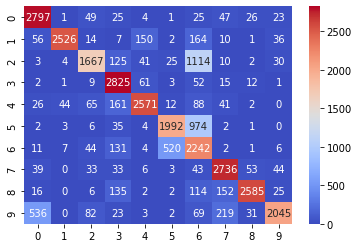

F1 Scores :
Class 0: F1 score = 0.7835
Class 1: F1 score = 0.8625
Class 2: F1 score = 0.9099
Class 3: F1 score = 0.6673
Class 4: F1 score = 0.8718
Class 5: F1 score = 0.8781
Class 6: F1 score = 0.7139
Class 7: F1 score = 0.5710
Class 8: F1 score = 0.8792
Class 9: F1 score = 0.8990
Metrics for 70.0 Train 30.000000000000004 Test data :
Classificaiton Accuracy - 80.40555555555555
Confusion Matrix :


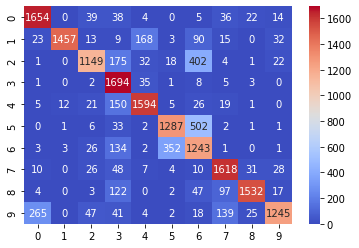

F1 Scores :
Class 0: F1 score = 0.7915
Class 1: F1 score = 0.8756
Class 2: F1 score = 0.8876
Class 3: F1 score = 0.7328
Class 4: F1 score = 0.8080
Class 5: F1 score = 0.8661
Class 6: F1 score = 0.7335
Class 7: F1 score = 0.6040
Class 8: F1 score = 0.8704
Class 9: F1 score = 0.8907
Metrics for 90.0 Train 9.999999999999998 Test data :
Classificaiton Accuracy - 82.23333333333333
Confusion Matrix :


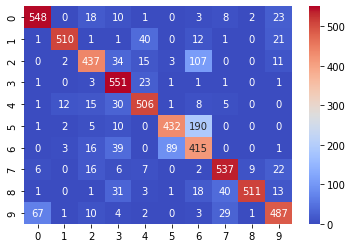

F1 Scores :
Class 0: F1 score = 0.8233
Class 1: F1 score = 0.8846
Class 2: F1 score = 0.9132
Class 3: F1 score = 0.7728
Class 4: F1 score = 0.8490
Class 5: F1 score = 0.8613
Class 6: F1 score = 0.7404
Class 7: F1 score = 0.6278
Class 8: F1 score = 0.8760
Class 9: F1 score = 0.8949


In [25]:
for i in split_ratios:
    X_train,y_train,X_test,y_test = split_data(X,y,i)
    y_train = y_train.reshape(y_train.shape[0])
    X_train = minmaxNormalize(X_train)
    X_class_cond = class_conditionals(X_train, y_train)

    prior_probabilities = prior_probs(X_class_cond,y_train)
    _, wts, m, c = get_gmm_estimates(X_class_cond, y_train,4)
    X_test = minmaxNormalize(X_test)
    y_preds = get_predictions_gmm(X_test, prior_probabilities, m, c, wts)
    y_preds = y_preds.reshape(y_preds.shape[0])
    test_accuracy = 100*np.mean(y_preds == y_test)
    print(f'Metrics for {i*100} Train {(1-i)*100} Test data :')
    print('\033[1m'+"Classificaiton Accuracy - {}".format(test_accuracy))
    print("Confusion Matrix :")
    get_confusion_matrix(y_test,y_preds)
  
    print("F1 Scores :")
    get_f1scores(y_test,y_preds)


In [ ]:
def likelihood_curve1(X,y):
  likelihood = []
  mix_num = []
  y = y.reshape(y.shape[0])
  X_class_cond = class_conditionals(X, y)
  priors = prior_probs(X_class_cond,y)
  for i in range(3,14):

    log_likelihoods, wts, m, c = get_gmm_estimates(X_class_cond, y,i)
    like = np.sum(log_likelihoods)
    print(like)
    likelihood.append(like)
    mix_num.append(i)

  plt.plot(mix_num, likelihood,color = 'green')
  plt.xlabel('No of Mixtures')
  plt.ylabel('Log Likelihood')
  plt.title('Likelihood curve for EM with number of mixtures')
  plt.show()

-2768.055349058227
-2768.05672297556
-2768.0611050721614
-2768.0553680901057
-2768.0580198986454
-2768.058804713735
-2768.0570347529456
-2768.0611212451427
-2768.0572384732786
-2768.061909101806
-2768.0572169870034


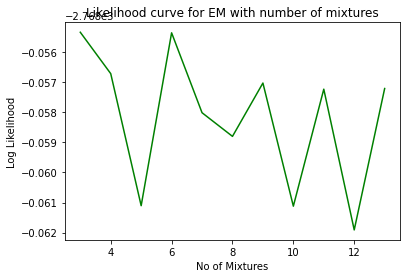

In [ ]:
X_train,y_train,X_test,y_test = split_data(X,y,0.9)
y_train = y_train.reshape(y_train.shape[0])
X_train = minmaxNormalize(X_train)
likelihood_curve1(X_train,y_train)


In [ ]:
label = train[1:,:][:,0]
tr  =train[1:,:][:,1:]
train = np.column_stack((tr,label))
for i in range(10):
  train[:,i] = (train[:,i] - np.min(train[:,i]))/(np.max(train[:,i])-np.min(train[:,i]))
train_90_10 = train[0:54000,:]
test_90_10 = train[54000:,:]

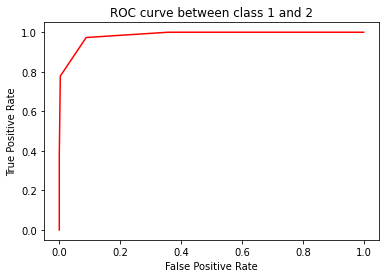

In [ ]:
roc_curve(train_90_10,test_90_10,1,2)